# Chris sutton
# HW #6

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2513 (delta 0), reused 5 (delta 0), pack-reused 2508
Receiving objects: 100% (2513/2513), 8.20 MiB | 17.06 MiB/s, done.
Resolving deltas: 100% (1573/1573), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.9 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408216 sha256=d22badcf566e1ad4d84f620ccdc9c9f23bb712bbb93a444aa6e7fb0238cdc198
  Stored in directory: /root/.cache/pip/wheels/58/9e/14/30f7cc4dafdd4d602fb00ca33c6edd1424fc0f5df10a02e060
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=7db556db5f54b31e40d4d993375e2fe22d2f9594e5e77d161e035d39fa599216
  Sto

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [ ]:
# # !bash ./datasets/download_pix2pix_dataset.sh facades



In [ ]:
! rm /content/MNIST/ -r

In [ ]:
# ! rm /content/MNIST/ -r
import zipfile
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/MNIST')

In [ ]:
!ls /content/MNIST/trainingSet/trainingSet

0  1  2  3  4  5  6  7	8  9


In [ ]:
path = "/content/MNIST/trainingSet/trainingSet/"  # Replace with the path to your directory

for folder in os.listdir(path):
  count = 0
  # print(folder)
  for file_name in os.listdir(path +folder):
      # print(file_name)
      if os.path.isfile(os.path.join(path+folder, file_name)):
          extension = os.path.splitext(file_name)[1]  # Get the file extension
          if count >= 3794:
            os.remove(path+folder+'/'+file_name)
          else:
            new_name = f"{count}{extension}"  # Generate the new file name
            os.rename(os.path.join(path+folder, file_name), os.path.join(path+folder, new_name))
            count += 1


In [ ]:
# !ls /content/MNIST/trainingSet/trainingSet/3

In [ ]:
import shutil

# src_file = "/path/to/source/file"  # Replace with the path to the source file
# dst_dir = "/path/to/destination/directory"  # Replace with the path to the destination directory

# shutil.copy2(src_file, dst_dir)

path = "/content/MNIST/trainingSet/trainingSet/"  # Replace with the path to your directory
patha = '/content/MNIST/A/train'
pathb = '/content/MNIST/B/train'
! mkdir /content/MNIST/A
! mkdir /content/MNIST/A/train
! mkdir /content/MNIST/B
! mkdir /content/MNIST/B/train
for folder in os.listdir(path):
  for file_name in os.listdir(path+folder):
      if os.path.isfile(os.path.join(path+folder, file_name)):
          if folder in ('0','2','4','6','8'):
            shutil.copy2(path+folder+'/'+file_name, os.path.join(patha, folder+file_name))
          elif folder == '1':
              shutil.copy2(path+folder+'/'+file_name, os.path.join(pathb, '0'+file_name))
          elif folder == '3':
              shutil.copy2(path+folder+'/'+file_name, os.path.join(pathb, '2'+file_name))
          elif folder == '5':
              shutil.copy2(path+folder+'/'+file_name, os.path.join(pathb, '4'+file_name))
          elif folder == '7':
              shutil.copy2(path+folder+'/'+file_name, os.path.join(pathb, '6'+file_name))
          elif folder == '9':
              shutil.copy2(path+folder+'/'+file_name, os.path.join(pathb, '8'+file_name))



In [ ]:
# ! ls /content/MNIST/testSet/testSet
! mkdir /content/MNIST/C
!python datasets/combine_A_and_B.py --fold_A /content/MNIST/A --fold_B /content/MNIST/B --fold_AB /content/MNIST/C

[fold_A] =  /content/MNIST/A
[fold_B] =  /content/MNIST/B
[fold_AB] =  /content/MNIST/C
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = train, use 18970/18970 images
split = train, number of images = 18970


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2023-04-05 03:11:01--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  19.4MB/s    in 22s     

2023-04-05 03:11:24 (9.39 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
!python train.py --dataroot /content/MNIST/C --name Sutton_pix2pix --model pix2pix  --display_id -1 --n_epochs 0 --n_epochs_decay 2

# --direction BtoA

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/MNIST/C              	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

In [ ]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

# Visualize

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png')
plt.imshow(img)

FileNotFoundError: ignored

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_A.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
plt.imshow(img)

#### Training Loss

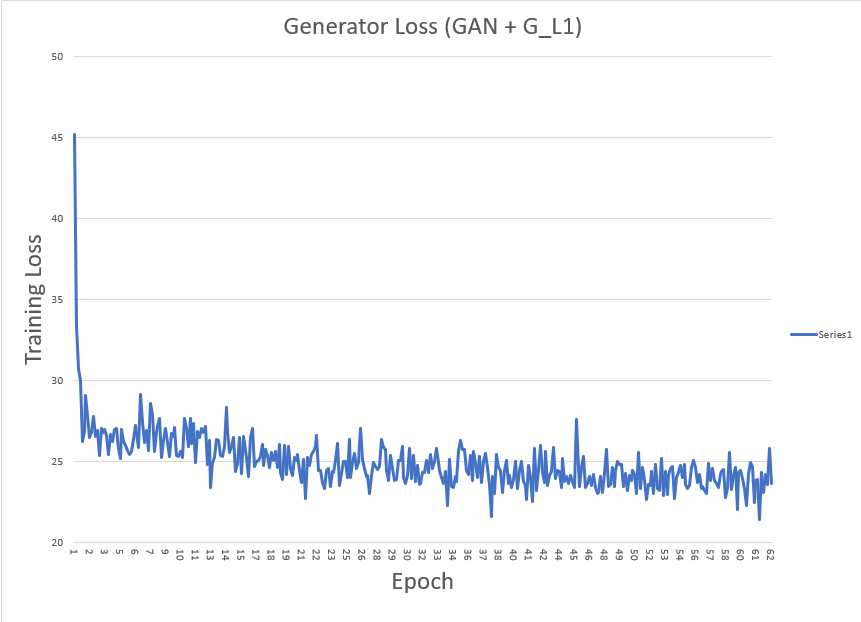

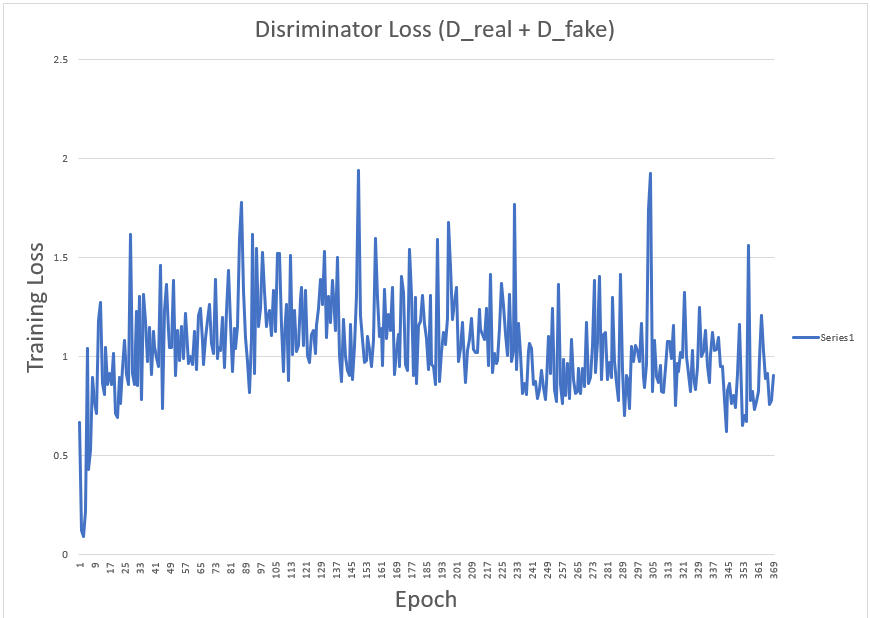

Generated images - labed real

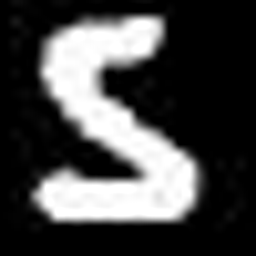

Generated Image Labeled fake

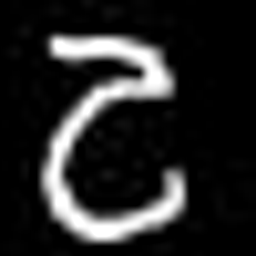

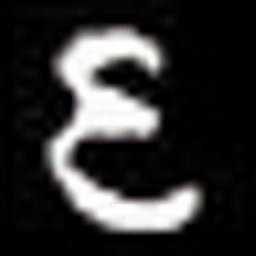